# US State comparison


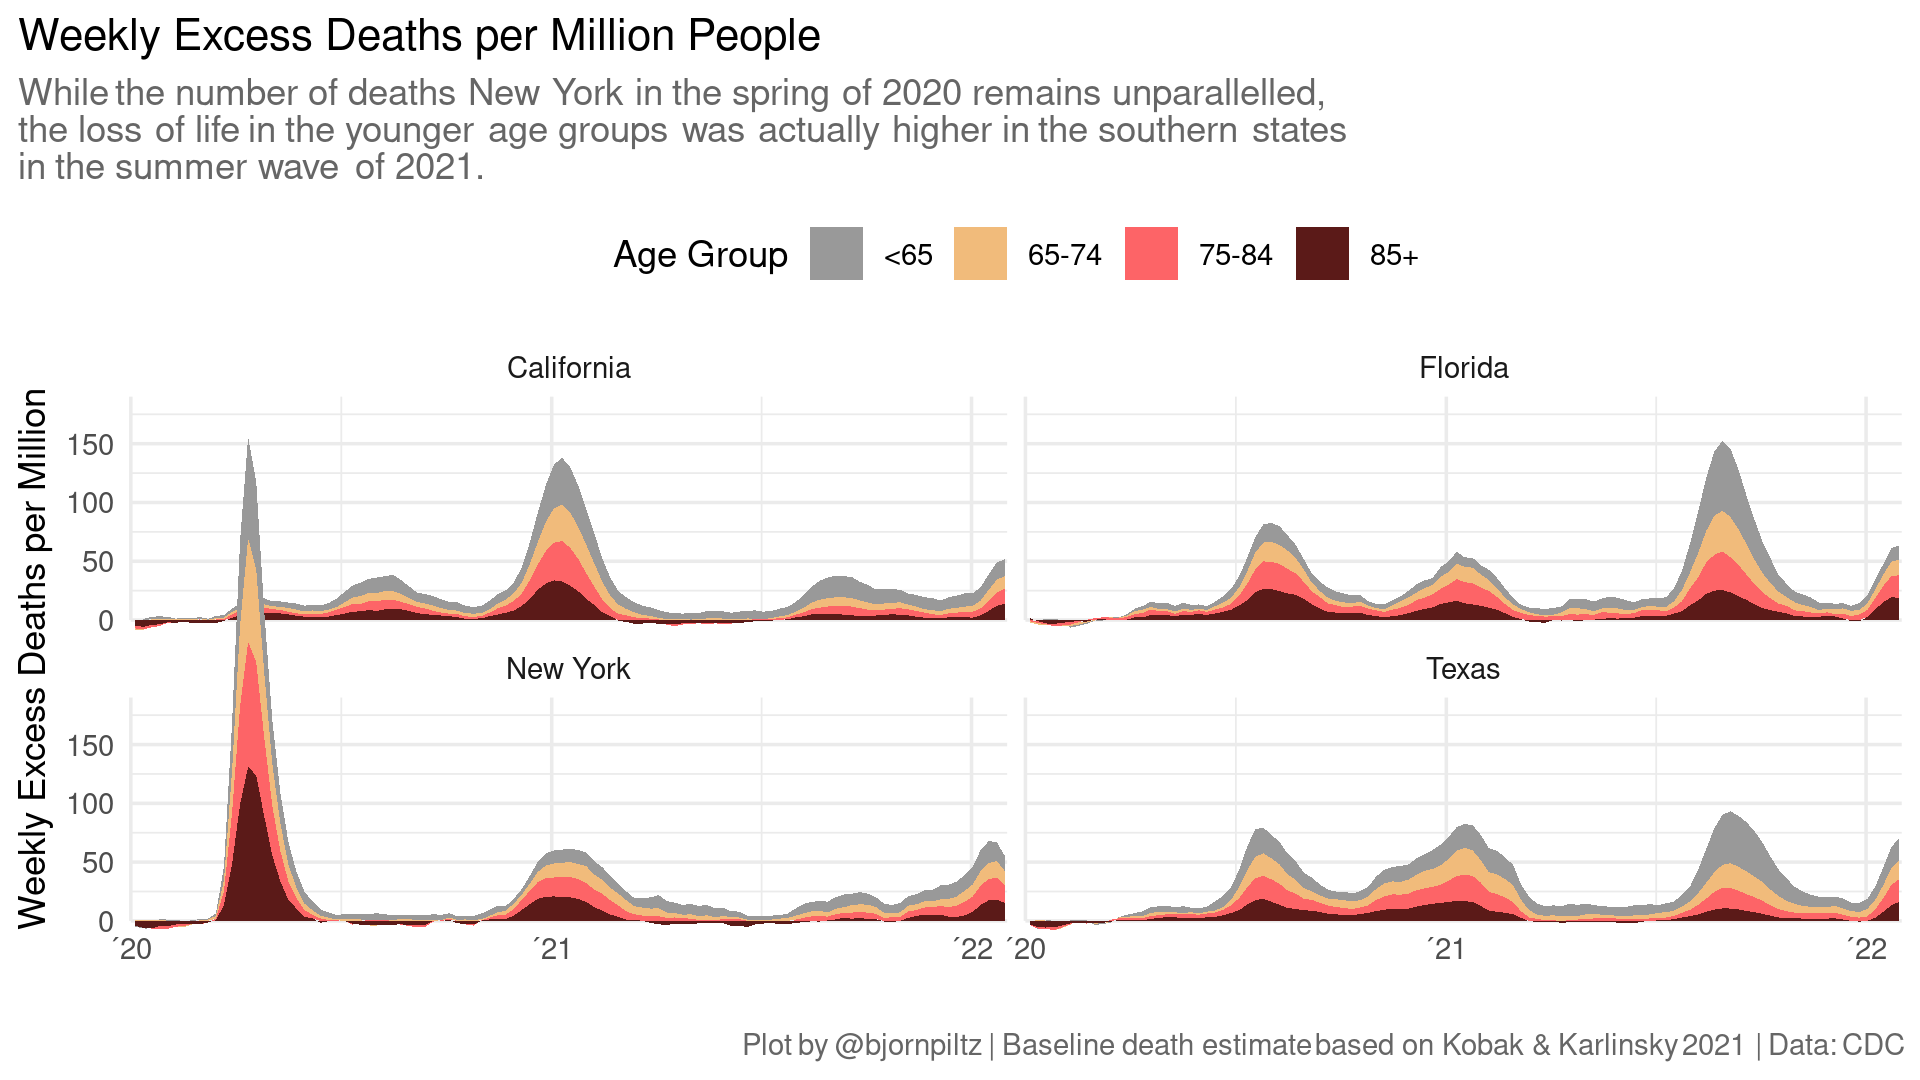

In [3]:
library(tidyverse)
library(ggtext)

options(repr.plot.width = 8, repr.plot.height = 4.5, repr.plot.res = 240)

read_rds("data/us_excess_deaths_per_age_group.rds")%>%
  filter(Jurisdiction %in% c("New York", "Florida", "California", "Texas"))%>%
  spread(Type, `Number of Deaths`)%>%
  group_by(`Age Group`)%>%
  mutate(Excess_mean = zoo::rollmean(Observed-Predicted, k = 3, na.pad = T, align  = "center"))%>%
  filter(Year>=2020 & Date<="2022-02-01")%>%
  ggplot(aes(x = Date, y = Excess_mean/Population_all_ages*1000000, fill = `Age Group`)) +
  labs(title = "Weekly Excess Deaths per Million People",
       subtitle = "While the number of deaths New York in the spring of 2020 remains unparallelled,<br> the loss of life in the younger age groups was actually higher in the southern states <br> in the summer wave of 2021.",
       caption = "Plot by @bjornpiltz | Baseline death estimate based on Kobak & Karlinsky 2021 | Data: CDC",
       x = "", y = "Weekly Excess Deaths per Million") +
  geom_area() +
  scale_fill_manual(values = c('#999999', '#F1BB7B', '#FD6467', '#5B1A18')) +
  coord_cartesian(ylim = c(0, 190), expand = F, clip = "off",
                  xlim = as.Date(c("2020-01-01","2022-02-01"))) +
  #geom_vline(xintercept = as.Date("2021-09-22"), linetype = "longdash") +
  scale_x_date(date_labels = "´%y", date_breaks = "1 year") +
  theme_minimal() + theme(legend.position = "top",
        plot.title.position = "plot",
        plot.caption=element_markdown(color = "gray40"),
        plot.subtitle=element_markdown(color = "gray40")) +
  facet_wrap(~Jurisdiction, ncol = 2)